In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv(r"C:\Users\USER\Downloads\car_age_price.csv")
cars.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
cars.shape

(112, 2)

In [5]:
cars.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


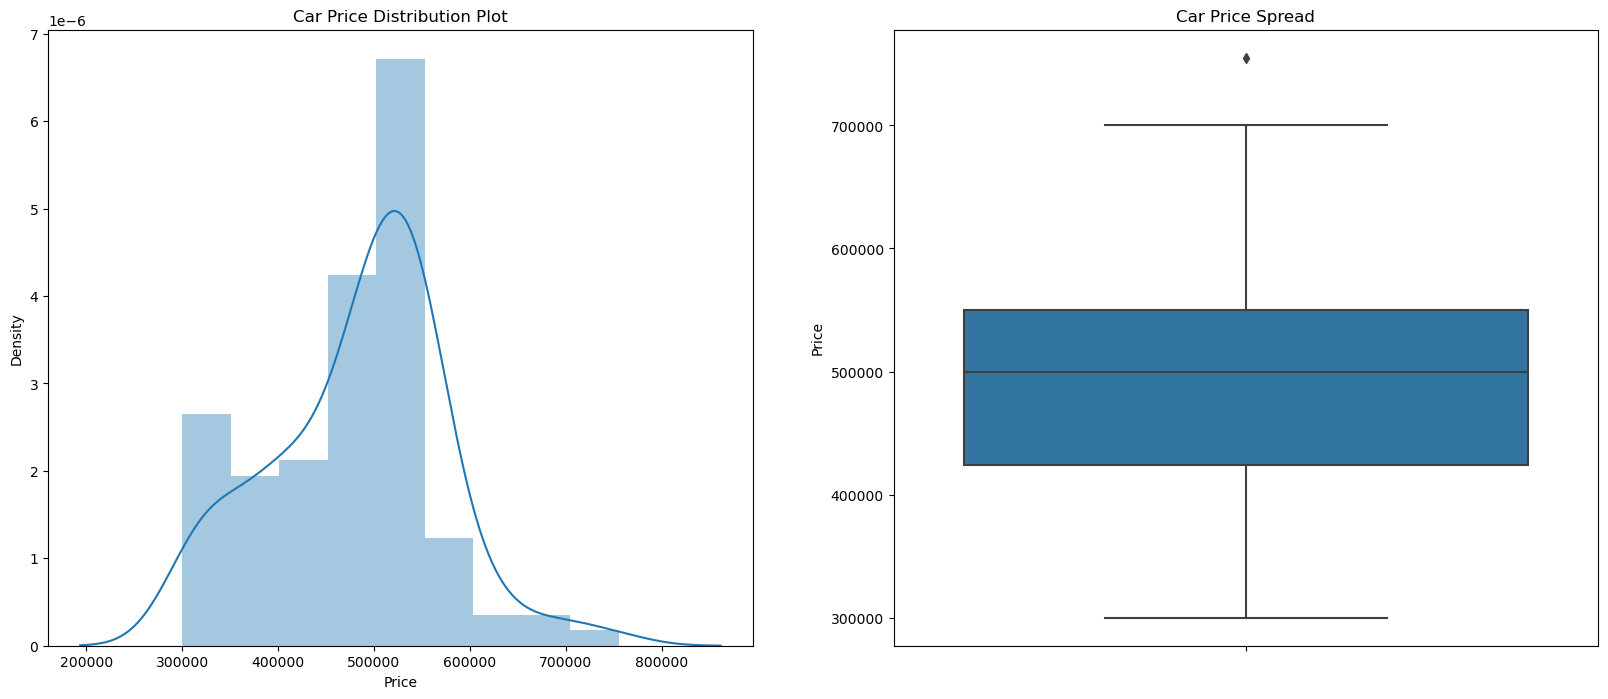

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

In [9]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count       112.000000
mean     483866.044643
std       91217.450533
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
85%      550000.000000
90%      572500.000000
100%     755000.000000
max      755000.000000
Name: Price, dtype: float64


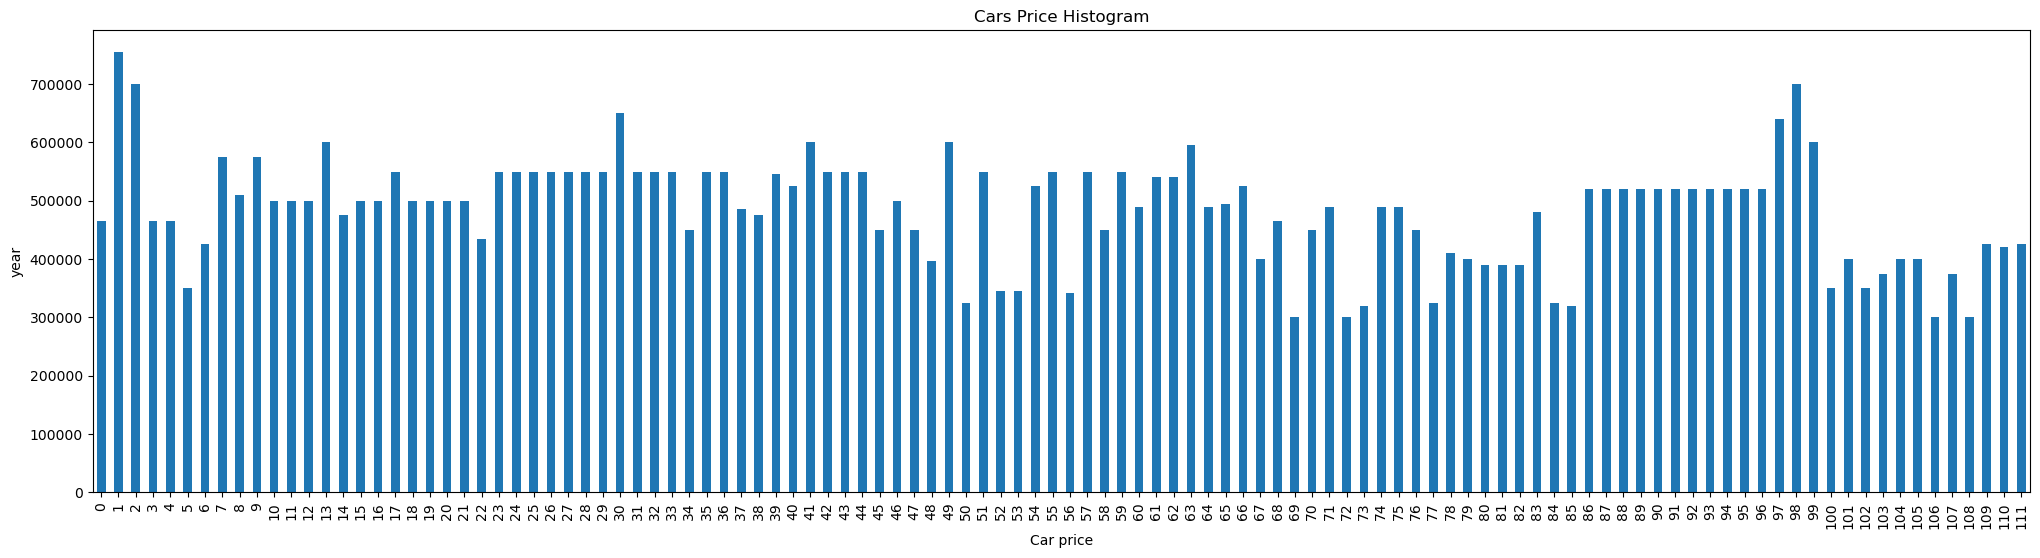

In [18]:
plt.figure(figsize=(25, 6))

plt1 = cars.Price.plot(kind='bar')
plt.title('Cars Price Histogram')
plt1.set(xlabel = 'Car price', ylabel='year')
plt.xticks(rotation=90)
plt.show()

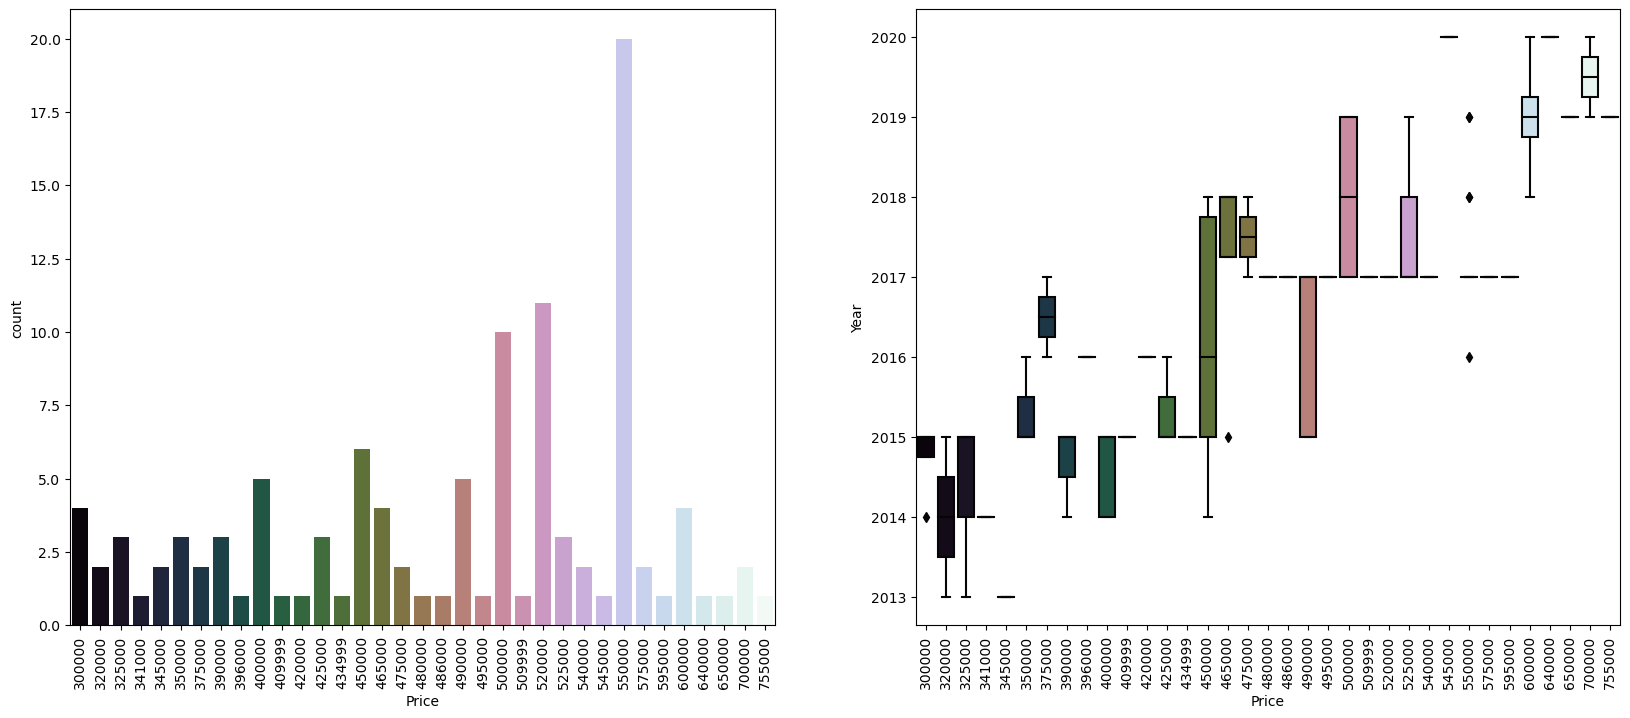

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(cars.Price, palette=("cubehelix"))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x=cars.Price, y=cars.Year, palette=("cubehelix"))
plt.xticks(rotation=90)
plt.show()

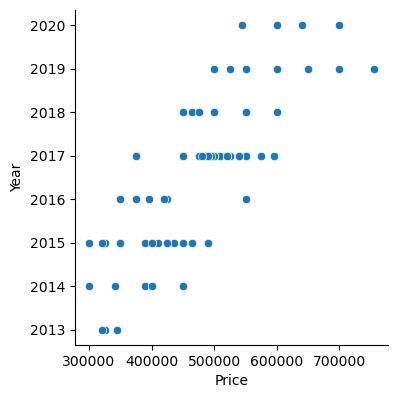

In [31]:
def pp(x):
    sns.pairplot(cars, x_vars=[x], y_vars='Year',size=4, aspect=1, kind='scatter')
    plt.show()

pp('Price')

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Year','Price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [34]:
df_train.head()

,Year,Price
20,0.714286,0.406977
37,0.571429,0.374419
6,0.428571,0.232558
3,0.714286,0.325581
12,0.571429,0.406977


In [35]:
df_train.describe()

,Year,Price
count,78.000000,78.000000
mean,0.531136,0.378295
std,0.242456,0.206771
min,0.000000,0.000000
25%,0.285714,0.232558
50%,0.571429,0.389535
75%,0.714286,0.520349
max,1.000000,1.000000


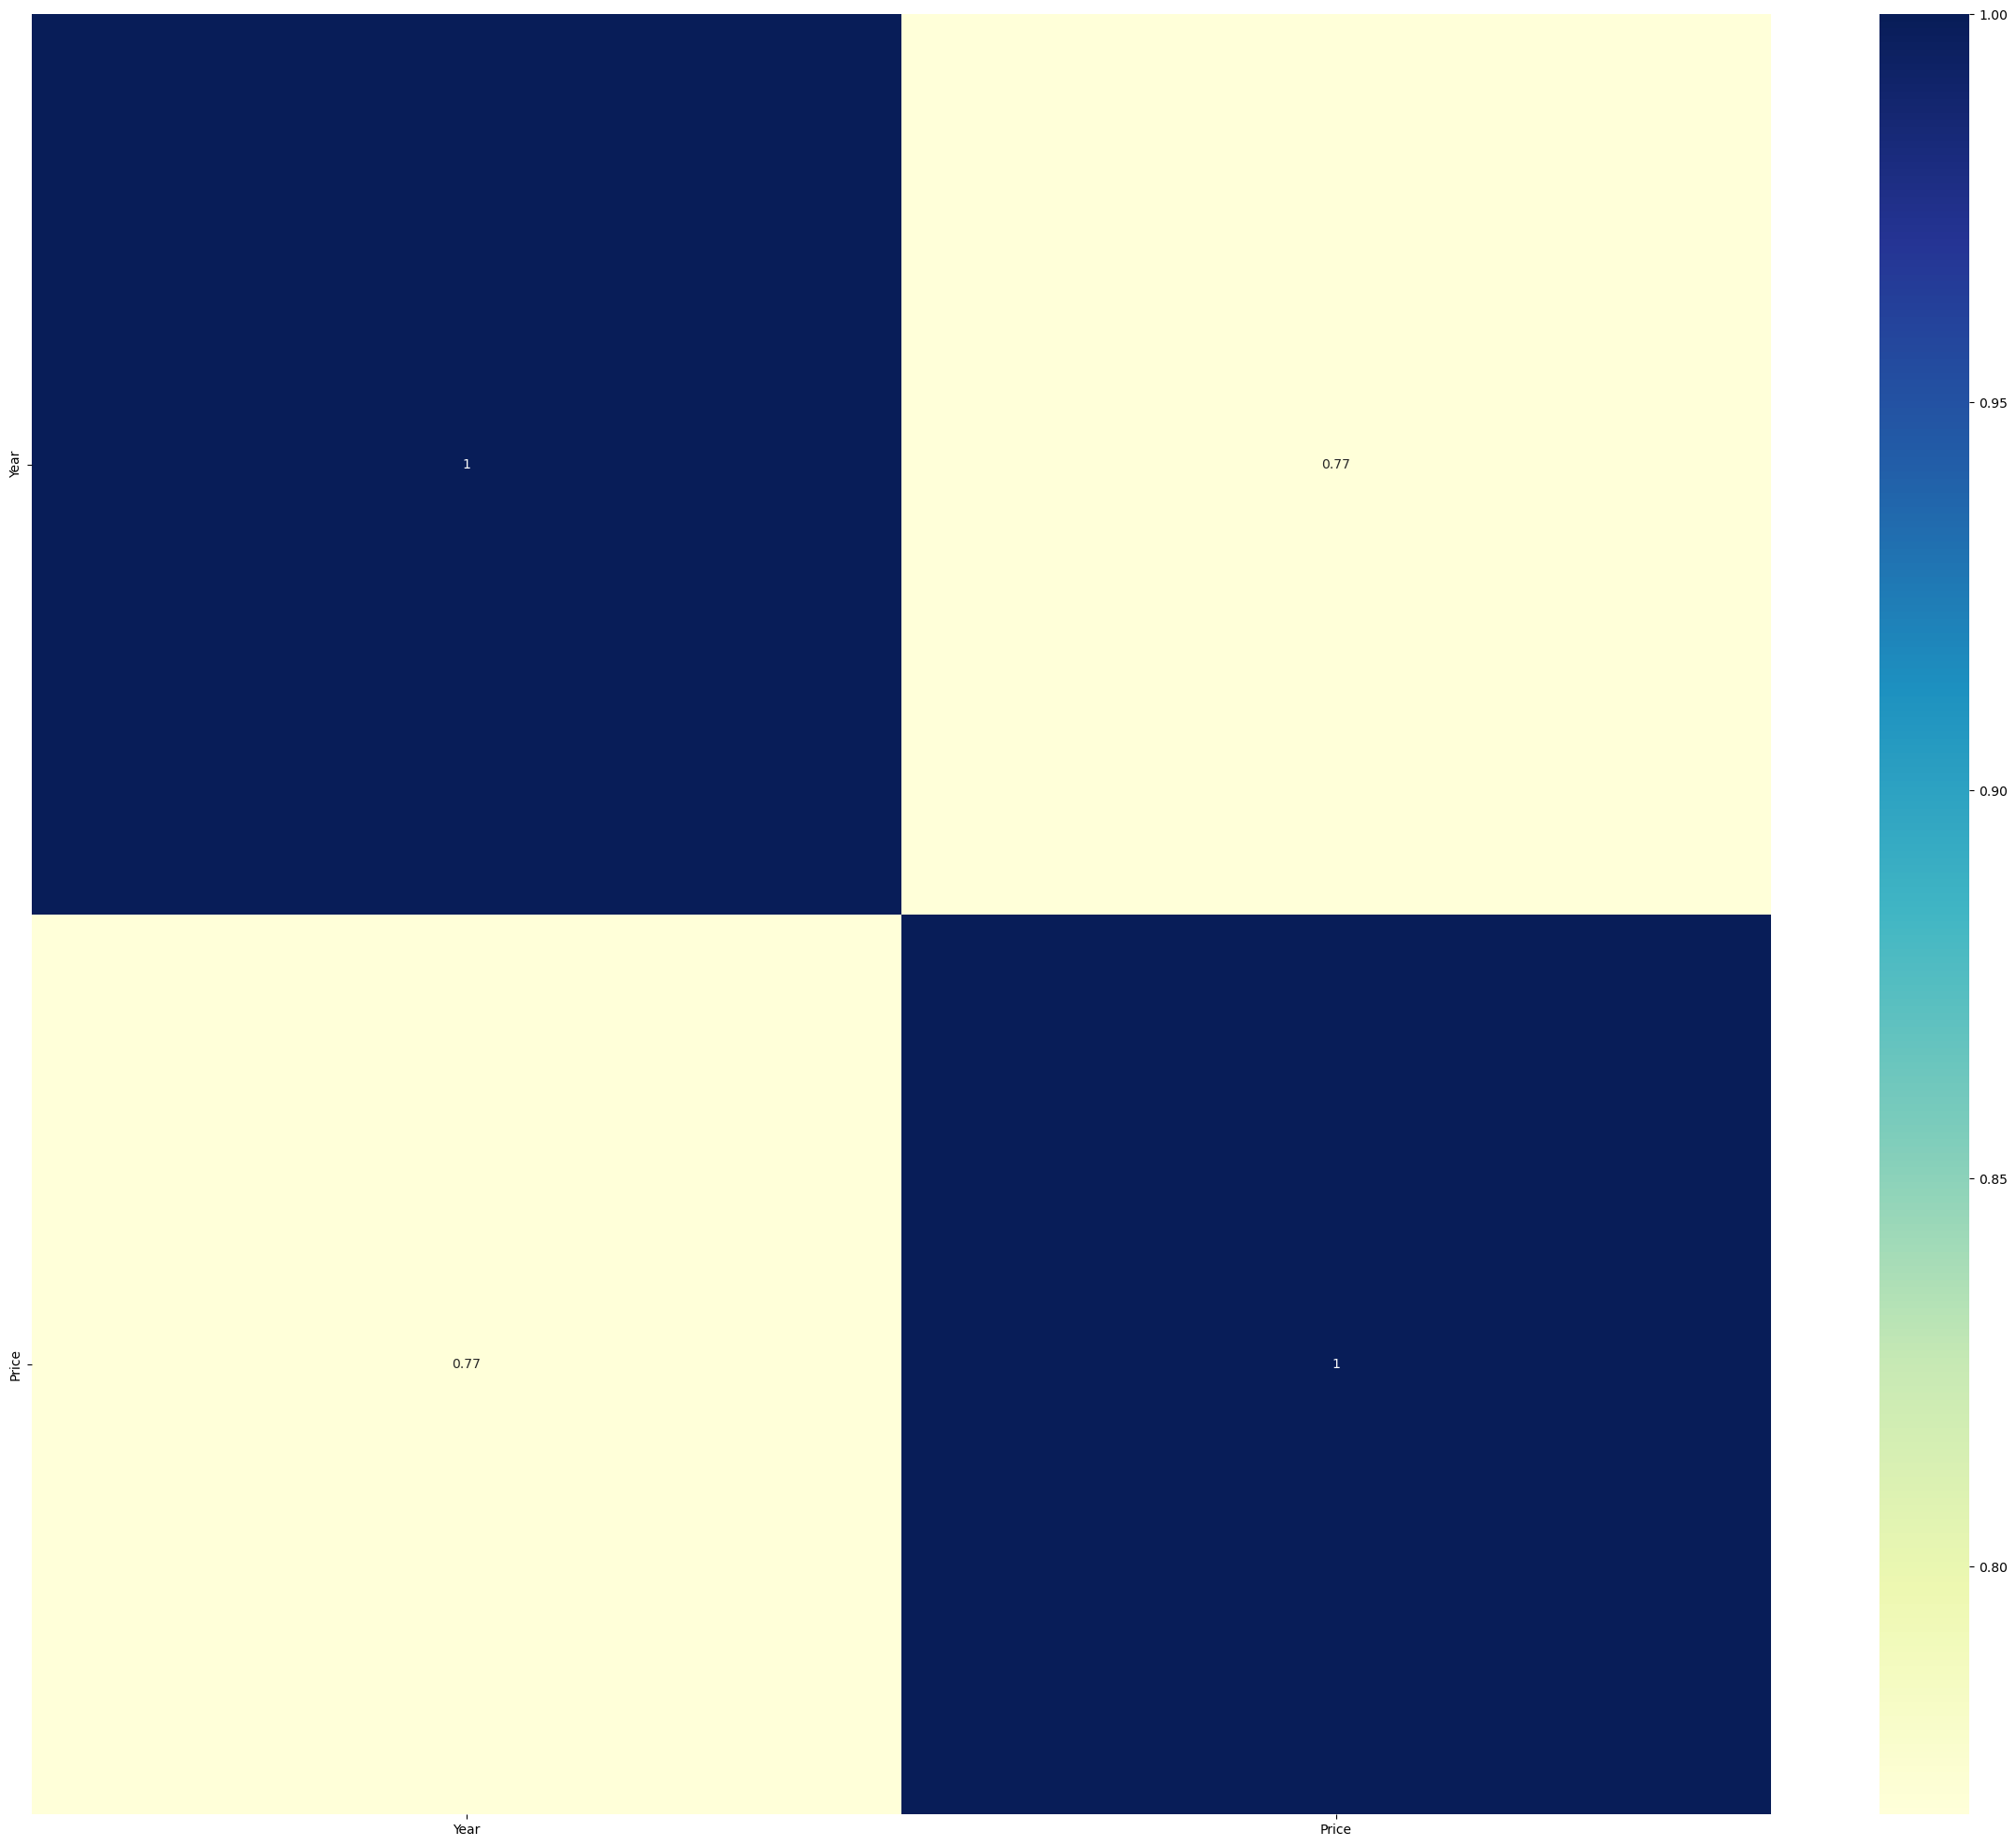

In [36]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:

y_train = df_train
X_train = df_train

In [56]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,step=10)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 2), ('Price', True, 1)]

In [58]:
X_train.columns[rfe.support_]

Index(['Price'], dtype='object')

In [59]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Price
20,0.406977
37,0.374419
6,0.232558
3,0.325581
12,0.406977


In [71]:
y_train_rfe = y_train[y_train.columns[rfe.support_]]
y_train_rfe.head()

,Price
20,0.406977
37,0.374419
6,0.232558
3,0.325581
12,0.406977


In [61]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit()
    print(lm.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [72]:
X_train_new = build_model(X_train_rfe,y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.674e+32
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        11:41:52   Log-Likelihood:                 2755.9
No. Observations:                  78   AIC:                            -5508.
Df Residuals:                      76   BIC:                            -5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.351e-16   2.63e-17      8.929      0.0

In [73]:
checkVIF(X_train_new)

,Features,VIF
0,const,4.39
1,Price,1.00


Text(0.5, 0, 'Errors')

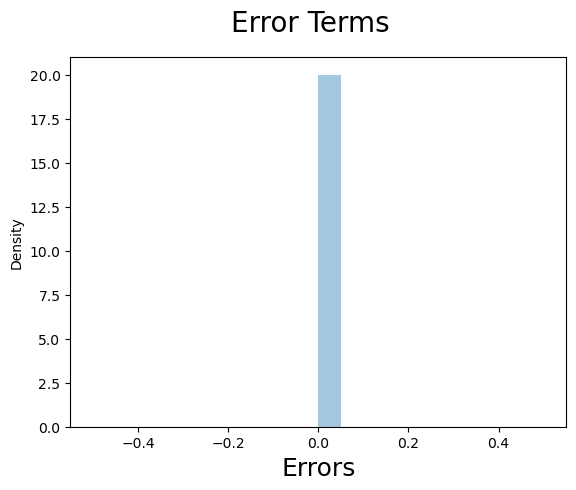

In [79]:
fig = plt.figure()
sns.distplot((y_train - y_train_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

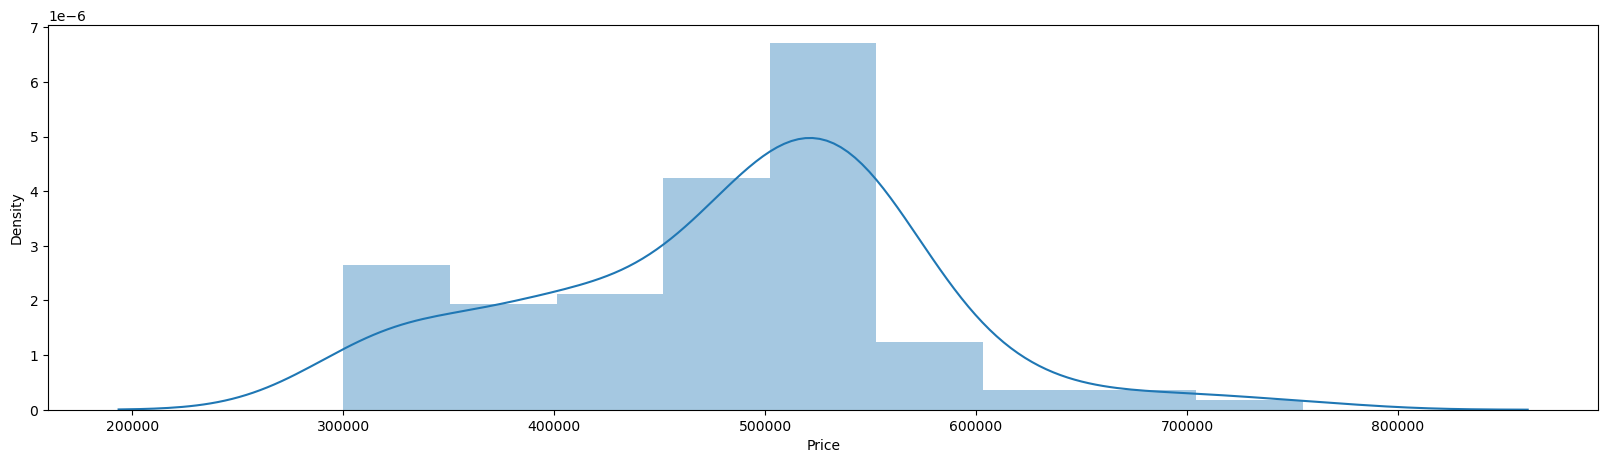

In [85]:
plt.figure(figsize=(20,5))
sns.distplot(cars['Price'])
plt.show()

In [86]:
cars_numeric = cars.select_dtypes(include=['float', 'int'])
cars_numeric.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


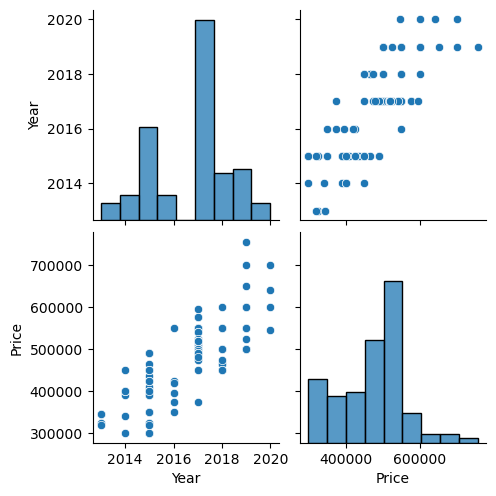

In [87]:
sns.pairplot(cars_numeric)
plt.show()

In [88]:
cor = cars_numeric.corr()
cor

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


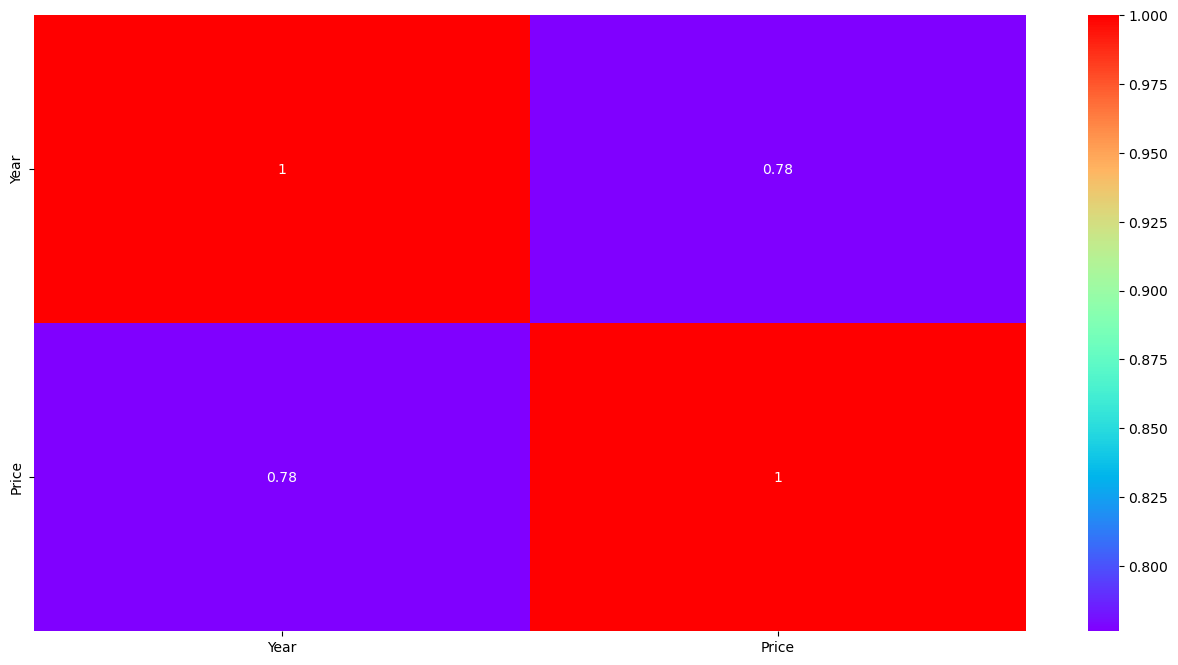

In [89]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()

In [91]:
cars.loc[cars['Price'] == "Hyundai"] = '2022'

In [92]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    112 non-null    object
 1   Price   112 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [97]:
X = cars.loc[:, ['Price', 'Year']]

y = cars['Price']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Price', 'Year']]=scaler.fit_transform(X_train[['Price', 'Year']])
X_train.head()

,Price,Year
20,0.139613,0.760286
37,-0.018866,0.167263
6,-0.709383,-0.425760
3,-0.256585,0.760286
12,0.139613,0.167263


In [100]:
X_test[['Price', 'Year']]=scaler.transform(X_test[['Price', 'Year']])
X_test.head()

,Price,Year
25,0.705610,0.167263
51,0.705610,0.760286
21,0.139613,1.353309
26,0.705610,0.167263
64,0.026413,-1.018783


In [101]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

NameError: name 'Lasso' is not defined

In [104]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [105]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005064,0.002927,0.002475,0.001217,0.0001,{'alpha': 0.0001},-0.000066,-0.000068,-0.000086,-0.000095,...,-0.000082,0.000012,1,-0.000075,-0.000076,-0.000077,-0.000086,-0.000079,-0.000079,0.000004
1,0.001835,0.000418,0.001019,0.000029,0.001,{'alpha': 0.001},-0.000664,-0.000676,-0.000855,-0.000952,...,-0.000817,0.000124,2,-0.000753,-0.000758,-0.000767,-0.000859,-0.000788,-0.000785,0.000039
2,0.001800,0.000397,0.001000,0.000005,0.01,{'alpha': 0.01},-0.006642,-0.006761,-0.008555,-0.009518,...,-0.008167,0.001241,3,-0.007530,-0.007584,-0.007667,-0.008591,-0.007880,-0.007850,0.000389
3,0.001821,0.000362,0.001188,0.000365,0.05,{'alpha': 0.05},-0.033209,-0.033805,-0.042774,-0.047590,...,-0.040837,0.006207,4,-0.037652,-0.037921,-0.038336,-0.042953,-0.039399,-0.039252,0.001944
4,0.001598,0.000488,0.001204,0.000407,0.1,{'alpha': 0.1},-0.066418,-0.067610,-0.085548,-0.095180,...,-0.081674,0.012414,5,-0.075304,-0.075841,-0.076673,-0.085906,-0.078797,-0.078504,0.003887


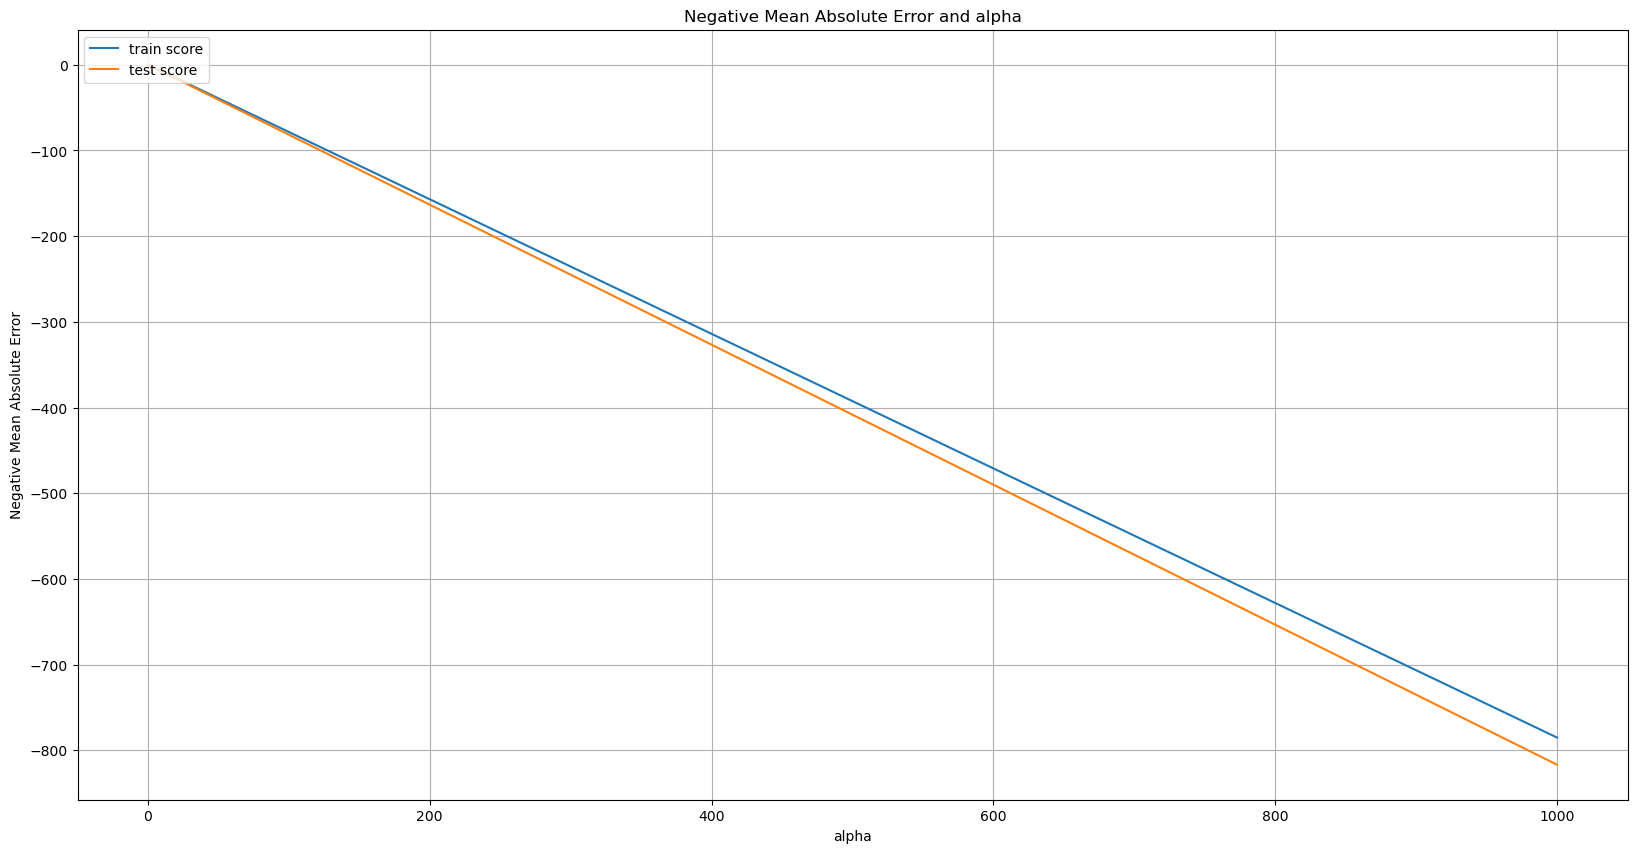

In [107]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [108]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([88239.61917652,     0.        ])

In [109]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,Price,88239.619177
1,Year,0.000000


In [110]:
imp_lasso =imp_lasso[imp_lasso['Coefficient'] !=0]
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,Price,88239.619177


In [111]:
y_pred = lasso.predict(X_test)

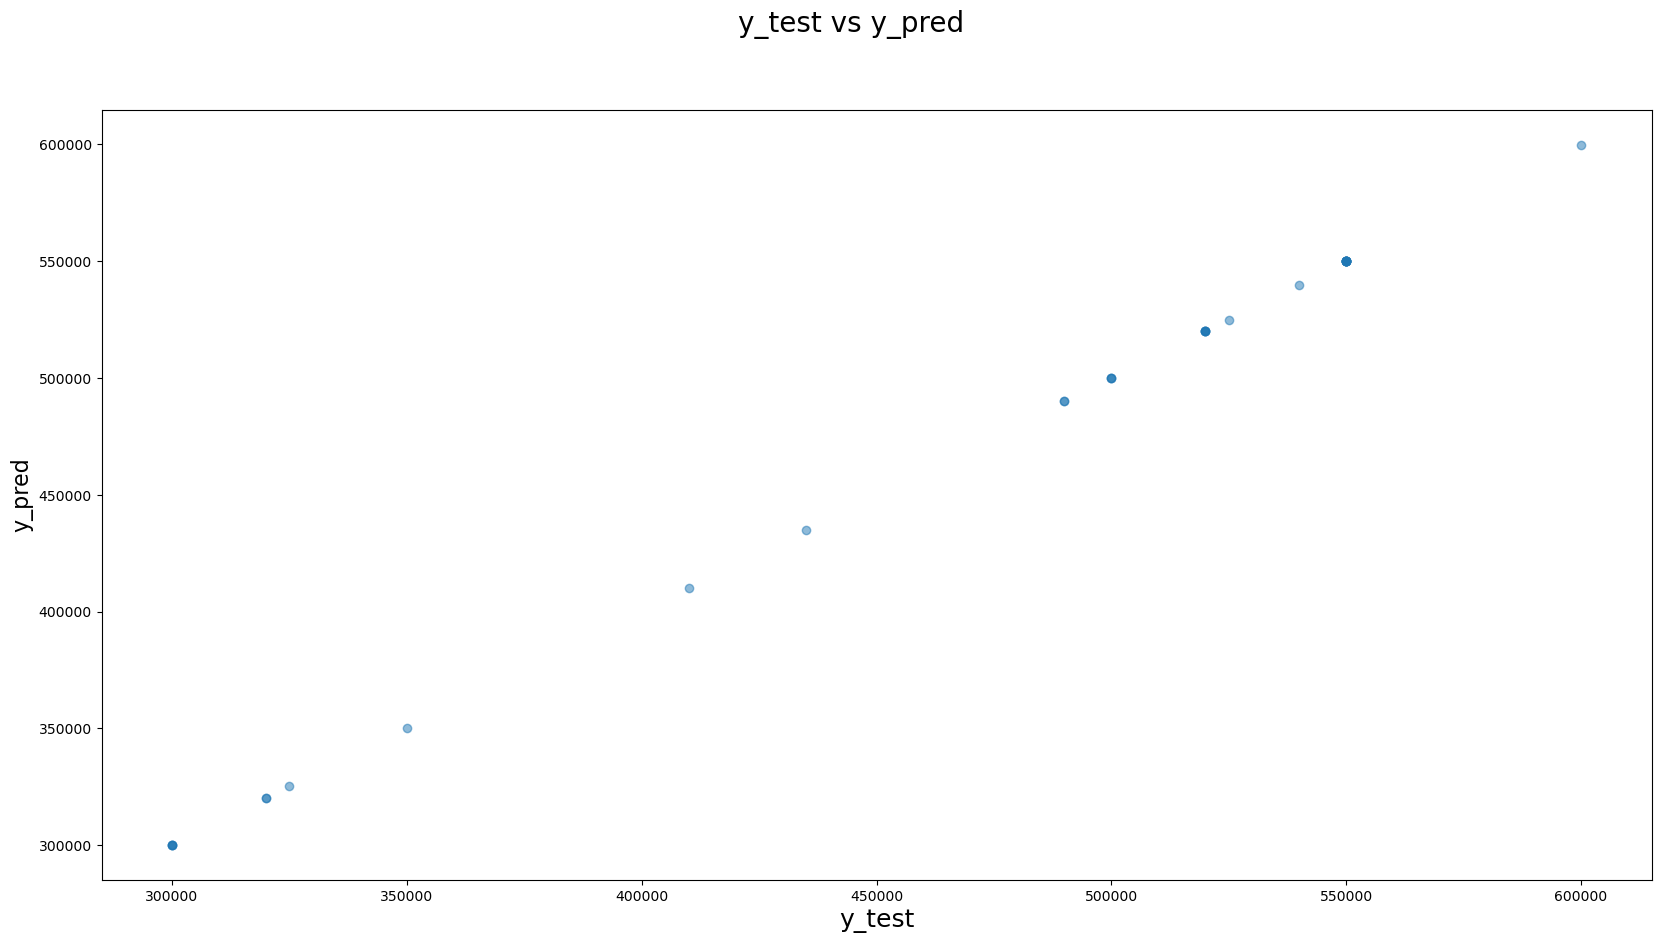

In [112]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [113]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
25,550000,549929.44
51,550000,549929.44
21,500000,499986.04
26,550000,549929.44
64,490000,489997.36


In [114]:
from sklearn import metrics

In [115]:
metrics.explained_variance_score(y_test,y_pred)

0.9999987185875048

In [116]:
metrics.mean_absolute_error(y_test,y_pred)

86.81964360827902

In [117]:
metrics.max_error(y_test,y_pred)

212.43769850448007

In [118]:
metrics.mean_squared_error(y_test,y_pred)

11928.582015877184

In [119]:
metrics.r2_score(y_test,y_pred)

0.9999986966418497

In [120]:
metrics.mean_poisson_deviance(y_test,y_pred)

0.034638229603468275

In [121]:
metrics.mean_gamma_deviance(y_test,y_pred)

1.0477196347104175e-07